In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:\Windows\Fonts\malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [12]:
import pandas as pd

In [13]:
native_filepath = "E:/oyj/042. 서울시 업종별 내외국인 신한카드 매출데이터/2. 파일데이터/2. 내국인(집계구)_성별연령대별/SEOUL_KOR_TOTREG_DEMO_"

In [20]:
def get_agedata(filepath):
    sum_data = pd.DataFrame()
    year = ['18', '19', '20']
    month = ['01','02','03','04','05','06','07','08','09','10','11','12']
    
    for y in year:
        for m in month:
            data = pd.read_csv(filepath + y + m +".txt", sep='|',encoding='utf-8',quotechar='`') 
            data = data[['내국인업종코드','성별','연령대별','카드이용금액계','카드이용건수계']]
            data = data.groupby(['연령대별']).sum()
            data['date'] = y+m
            data['year'] = '20'+y
            sum_data = pd.concat([sum_data,data])
        
    return sum_data

In [16]:
data1 = pd.read_csv(native_filepath + '18' + '01' +".txt", sep='|',encoding='utf-8',quotechar='`') 
data1 = data1[['내국인업종코드','성별','연령대별','카드이용금액계','카드이용건수계']]
data1 = data1.groupby(['연령대별']).sum()

In [134]:
# data1.head()

In [36]:
data_age = get_agedata(native_filepath)

In [22]:
def get_sexdata(filepath):
    sum_data = pd.DataFrame()
    year = ['18', '19', '20']
    month = ['01','02','03','04','05','06','07','08','09','10','11','12']
    
    for y in year:
        for m in month:
            data = pd.read_csv(filepath + y + m +".txt", sep='|',encoding='utf-8',quotechar='`') 
            data = data[['내국인업종코드','성별','연령대별','카드이용금액계','카드이용건수계']]
            data = data.groupby(['성별']).sum()
            data['date'] = y+m
            data['year'] = '20'+y
            sum_data = pd.concat([sum_data,data])

    return sum_data

In [23]:
data_sex = get_sexdata(native_filepath)

In [133]:
# data_sex.head()

In [132]:
data_sex = data_sex.reset_index()
# data_sex.head()

In [62]:
data_sex2 = data_sex.groupby(['year','성별']).sum()
data_sex2['카드이용금액계'] = data_sex2['카드이용금액계']/10000000000
data_sex2 = data_sex2.reset_index()

In [131]:
data_hap = data_sex.groupby(['year']).sum()
data_hap['카드이용금액계'] = data_hap['카드이용금액계']/10000000000
data_hap = data_hap.reset_index()
# data_hap

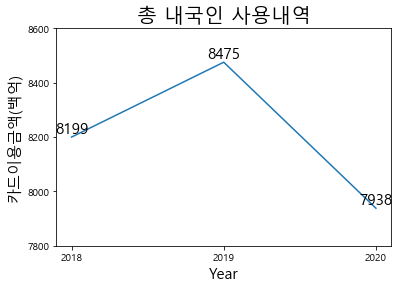

In [102]:
label = data_hap['year']
sns.lineplot(label, data_hap['카드이용금액계'])
plt.title('총 내국인 사용내역',fontsize =20)
plt.ylabel('카드이용금액(백억)',fontsize =15)
plt.xlabel('Year',fontsize =15)
plt.yticks([7800,8000,8200,8400,8600])
for i, v in enumerate(label):
    plt.text(v,int(data_hap['카드이용금액계'][i]),int(data_hap['카드이용금액계'][i]),
            fontsize=15,
            color='black',
            horizontalalignment='center',
            verticalalignment='bottom')

In [130]:
# data_age2

In [61]:
data_age2 = data_age.groupby(['year','연령대별']).sum()
data_age2['카드이용금액계'] = data_age2['카드이용금액계']/10000000000
data_age2 = data_age2.reset_index()

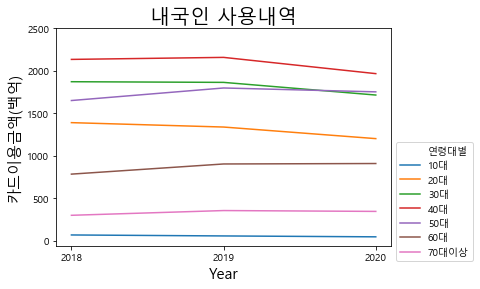

In [109]:
label = data_age2['year']
sns.lineplot(label, data_age2['카드이용금액계'], hue=data_age2['연령대별'])
plt.title('내국인 사용내역',fontsize =20)
plt.ylabel('카드이용금액(백억)',fontsize =15)
plt.xlabel('Year',fontsize =15)
plt.yticks([0,500,1000,1500,2000,2500])
plt.legend(bbox_to_anchor=(1,0.5))

([<matplotlib.axis.YTick at 0x7a90ec2d68>,
 <a list of 5 Text yticklabel objects>)

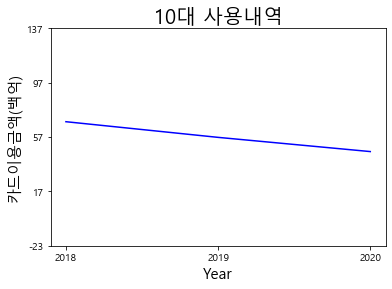

In [112]:
age10 = data_age2[data_age2['연령대별']=='10대']
sns.lineplot(label, age10['카드이용금액계'],color='blue')
plt.title('10대 사용내역',fontsize =20)
plt.ylabel('카드이용금액(백억)',fontsize =15)
plt.xlabel('Year',fontsize =15)
mean10 = int(age10['카드이용금액계'].mean())
plt.yticks([mean10-80,mean10-40,mean10,mean10+40,mean10+80])

([<matplotlib.axis.YTick at 0x7a90f10d68>,
 <a list of 5 Text yticklabel objects>)

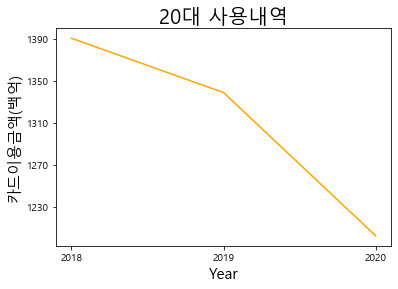

In [113]:
age20 = data_age2[data_age2['연령대별']=='20대']
sns.lineplot(label, age20['카드이용금액계'],color='orange')
plt.title('20대 사용내역',fontsize =20)
plt.ylabel('카드이용금액(백억)',fontsize =15)
plt.xlabel('Year',fontsize =15)
mean20 = int(age20['카드이용금액계'].mean())
plt.yticks([mean20-80,mean20-40,mean20,mean20+40,mean20+80])

([<matplotlib.axis.YTick at 0x7a90f67f60>,
 <a list of 5 Text yticklabel objects>)

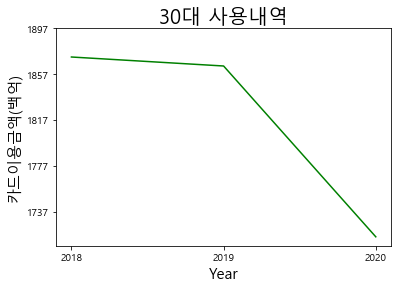

In [114]:
age30 = data_age2[data_age2['연령대별']=='30대']
sns.lineplot(label,age30['카드이용금액계'],color='green')
plt.title('30대 사용내역',fontsize =20)
plt.ylabel('카드이용금액(백억)',fontsize =15)
plt.xlabel('Year',fontsize =15)
mean30 = int(age30['카드이용금액계'].mean())
plt.yticks([mean30-80,mean30-40,mean30,mean30+40,mean30+80])

([<matplotlib.axis.YTick at 0x7a90fc0f98>,
 <a list of 5 Text yticklabel objects>)

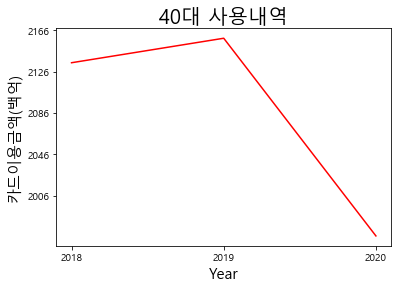

In [115]:
age40 = data_age2[data_age2['연령대별']=='40대']
sns.lineplot(label, age40['카드이용금액계'],color='red')
plt.title('40대 사용내역',fontsize =20)
plt.ylabel('카드이용금액(백억)',fontsize =15)
plt.xlabel('Year',fontsize =15)
mean40 = int(age40['카드이용금액계'].mean())
plt.yticks([mean40-80,mean40-40,mean40,mean40+40,mean40+80])

([<matplotlib.axis.YTick at 0x7a9be32160>,
 <a list of 5 Text yticklabel objects>)

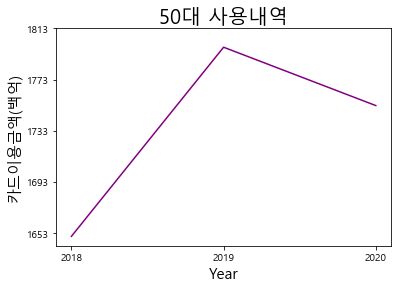

In [116]:
age50 = data_age2[data_age2['연령대별']=='50대']
sns.lineplot(label, age50['카드이용금액계'],color='purple')
plt.title('50대 사용내역',fontsize =20)
plt.ylabel('카드이용금액(백억)',fontsize =15)
plt.xlabel('Year',fontsize =15)
mean50 = int(age50['카드이용금액계'].mean())
plt.yticks([mean50-80,mean50-40,mean50,mean50+40,mean50+80])

([<matplotlib.axis.YTick at 0x7a9bff1b38>,
 <a list of 5 Text yticklabel objects>)

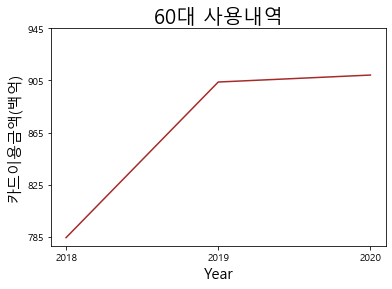

In [125]:
age60 = data_age2[data_age2['연령대별']=='60대']
sns.lineplot(label, age60['카드이용금액계'],color='brown')
plt.title('60대 사용내역',fontsize =20)
plt.ylabel('카드이용금액(백억)',fontsize =15)
plt.xlabel('Year',fontsize =15)
mean60 = int(age60['카드이용금액계'].mean())
plt.yticks([mean60-80,mean60-40,mean60,mean60+40,mean60+80])

([<matplotlib.axis.YTick at 0x7a9c047c18>,
 <a list of 5 Text yticklabel objects>)

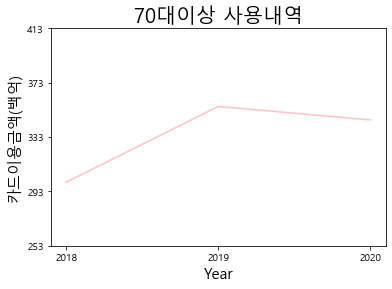

In [129]:
age70 = data_age2[data_age2['연령대별']=='70대이상']
sns.lineplot(label, age70['카드이용금액계'],color='pink')
plt.title('70대이상 사용내역',fontsize =20)
plt.ylabel('카드이용금액(백억)',fontsize =15)
plt.xlabel('Year',fontsize =15)
mean70 = int(age70['카드이용금액계'].mean())
plt.yticks([mean70-80,mean70-40,mean70,mean70+40,mean70+80])